<a href="https://colab.research.google.com/github/mmobik/Acoustic-Hit-Predictor-From-Audio-Features-to-Chart-Success/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЭТАП 1: Exploratory Data Analysis

**Цель**: Исследовать датасет, понять распределения признаков и найти закономерности.

---

# Импорт библиотек

In [ ]:
# Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Библиотеки импортированы успешно!")


Библиотеки импортированы успешно!


# Загрузка и проверка Датасета

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузка датасета
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv', index_col=0)

print(f"Загружено записей: {len(df)}")
print(f"Количество колонок: {len(df.columns)}")
print(f"Размер в памяти: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Вывод первых 10 записей
df.head(10)


Загружено записей: 114000
Количество колонок: 20
Размер в памяти: 49.66 MB


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


# Общая информация о данных

In [ ]:
# Информация о типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [ ]:
# Описательная статистика
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


---
# ЗАДАЧА 1: Анализ целевой переменной `popularity`

**Цель**: Понять, как распределена популярность треков, выявить выбросы и особенности.

**Гипотезы**:
- Ожидаем, что большинство треков имеют низкую популярность
- Возможно наличие выбросов (очень популярные треки)
- Распределение может быть скошенным

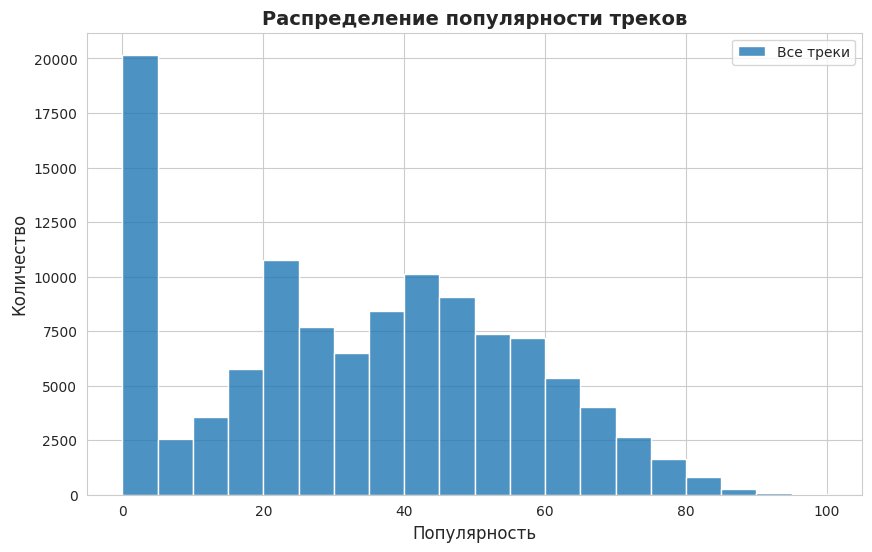

In [36]:
# Визуализация распределения popularity

sns.set_style("whitegrid")

# Создание графика распределения
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='popularity', bins=20, label='Все треки', alpha=0.8)



# Настройка оформления
plt.xlabel('Популярность', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Распределение популярности треков', fontsize=14, fontweight='bold')
plt.legend()

plt.show()

In [37]:
# Описательная статистика для popularity
print("="*60)
print("Статистика целевой переменной 'popularity':")
print("="*60)
print(df['popularity'].describe())
print(f"\nМедиана: {df['popularity'].median()}")
print(f"Мода: {df['popularity'].mode()[0]}")
print(f"Асимметрия (skewness): {df['popularity'].skew():.2f}")
print(f"Эксцесс (kurtosis): {df['popularity'].kurtosis():.2f}")

Статистика целевой переменной 'popularity':
count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

Медиана: 35.0
Мода: 0
Асимметрия (skewness): 0.05
Эксцесс (kurtosis): -0.93


In [39]:
# Выявление выбросов по методу IQR
Q1 = df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['popularity'] < lower_bound) | (df['popularity'] > upper_bound)]
print(f"\nГраницы для выбросов:")
print(f"   Нижняя граница: {lower_bound:.2f}")
print(f"   Верхняя граница: {upper_bound:.2f}")
print(f"\nКоличество выбросов: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")


Границы для выбросов:
   Нижняя граница: -32.50
   Верхняя граница: 99.50

Количество выбросов: 2 (0.00%)


# Вывод по Задаче 1:

**Обнаружили**:
1. форма распределения похоже на нормальное, но немного сплюснуто
2. [Укажите медиану и среднее]
3. [Количество и процент выбросов]
4. [Особенности распределения]

**Что это значит**:
- [Интерпретация для задачи ML]
- [Возможные проблемы]
- [Идеи для улучшения]

**Следующие шаги**:
- [Что делать дальше]

---

# 📊 ЗАДАЧА 2: Исследование числовых признаков

**Цель**: Понять распределение всех числовых признаков и выявить аномалии.

*(Продолжите здесь...)*

In [ ]:
# Ваш код для Задачи 2